In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <center> Data Loading and Overview

In [3]:
# Load the dataset
df = pd.read_csv('trips.csv')

# Display the first few rows of the dataframe
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


## <center> Data Cleaning

In [4]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name      99
end_station_id        99
start_lat              0
start_lng              0
end_lat               99
end_lng               99
member_casual          0
dtype: int64


## <center> Exploratory Data Analysis (EDA)

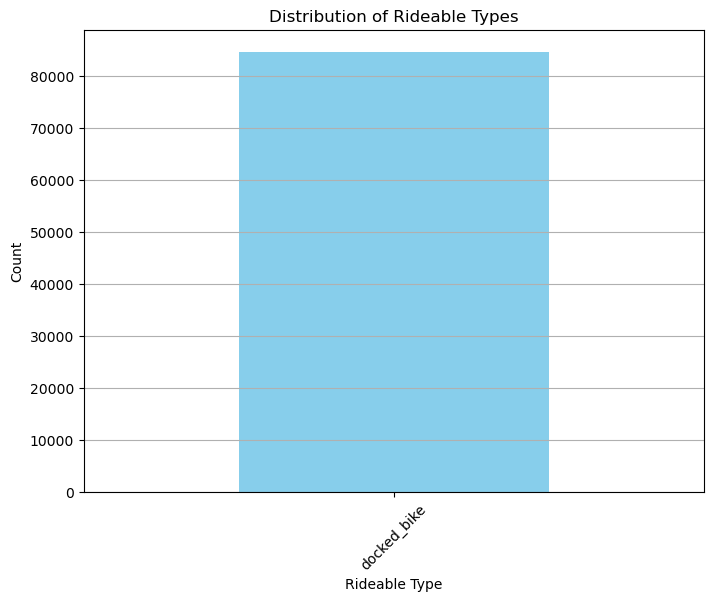

In [5]:
# Plot histogram for rideable_type
plt.figure(figsize=(8, 6))
df['rideable_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Rideable Types')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# <center> EDA is performed by plotting a histogram to visualize the distribution of rideable types in the dataset.

# Spatial Distribution Visualization

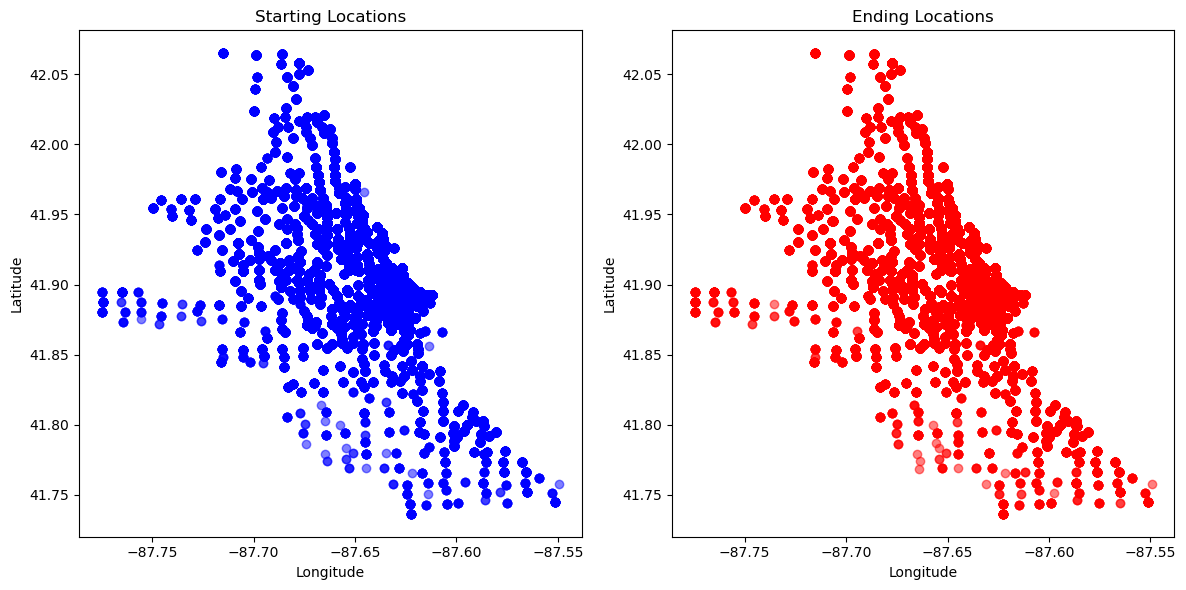

In [6]:
# Scatter plot of starting and ending latitudes and longitudes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['start_lng'], df['start_lat'], alpha=0.5, color='blue')
plt.title('Starting Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(df['end_lng'], df['end_lat'], alpha=0.5, color='red')
plt.title('Ending Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()
#This step visualizes the spatial distribution of starting and ending stations by plotting their respective latitudes and longitudes on scatter plots.

 # Data Preprocessing

In [7]:
# Convert 'started_at' and 'ended_at' columns to datetime objects
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate the duration of each ride in minutes
df['ride_duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Convert 'rideable_type' and 'member_casual' columns to categorical
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')


In [8]:
#This step involves preprocessing the data. It converts the 'started_at' and 'ended_at' columns to datetime objects for easier manipulation. It also calculates the duration of each ride in minutes and converts categorical columns

# Exploring Relationships

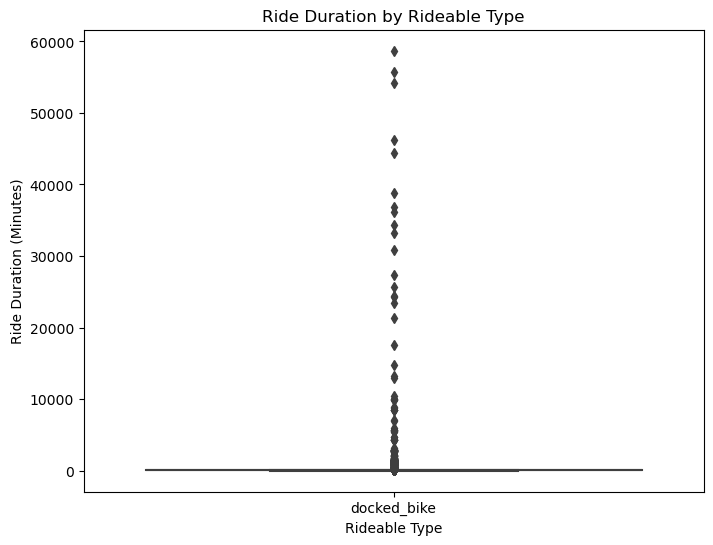

In [9]:
# Explore relationship between rideable type and ride duration
plt.figure(figsize=(8,6))
sns.boxplot(x='rideable_type', y='ride_duration_minutes', data=df)
plt.title('Ride Duration by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Ride Duration (Minutes)')
plt.show()
#This step explores the relationship between rideable type and ride duration by plotting a boxplot.

# Analyzing Station Utilization

In [10]:
# Analyze the distribution of start and end stations
station_utilization = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
#Here, we analyze the distribution of start and end stations by counting the number of rides between each unique start-end station pair.

# Creating Station Matrix

In [11]:
# Pivot the DataFrame to create a matrix of station counts
station_matrix = station_utilization.pivot(index='start_station_name', columns='end_station_name', values='count')
#This step pivots the dataframe to create a matrix of station counts, where rows represent start stations, columns representend stations, and cell values represent the number of rides between each pair of stations.

# Visualizing Station Utilization

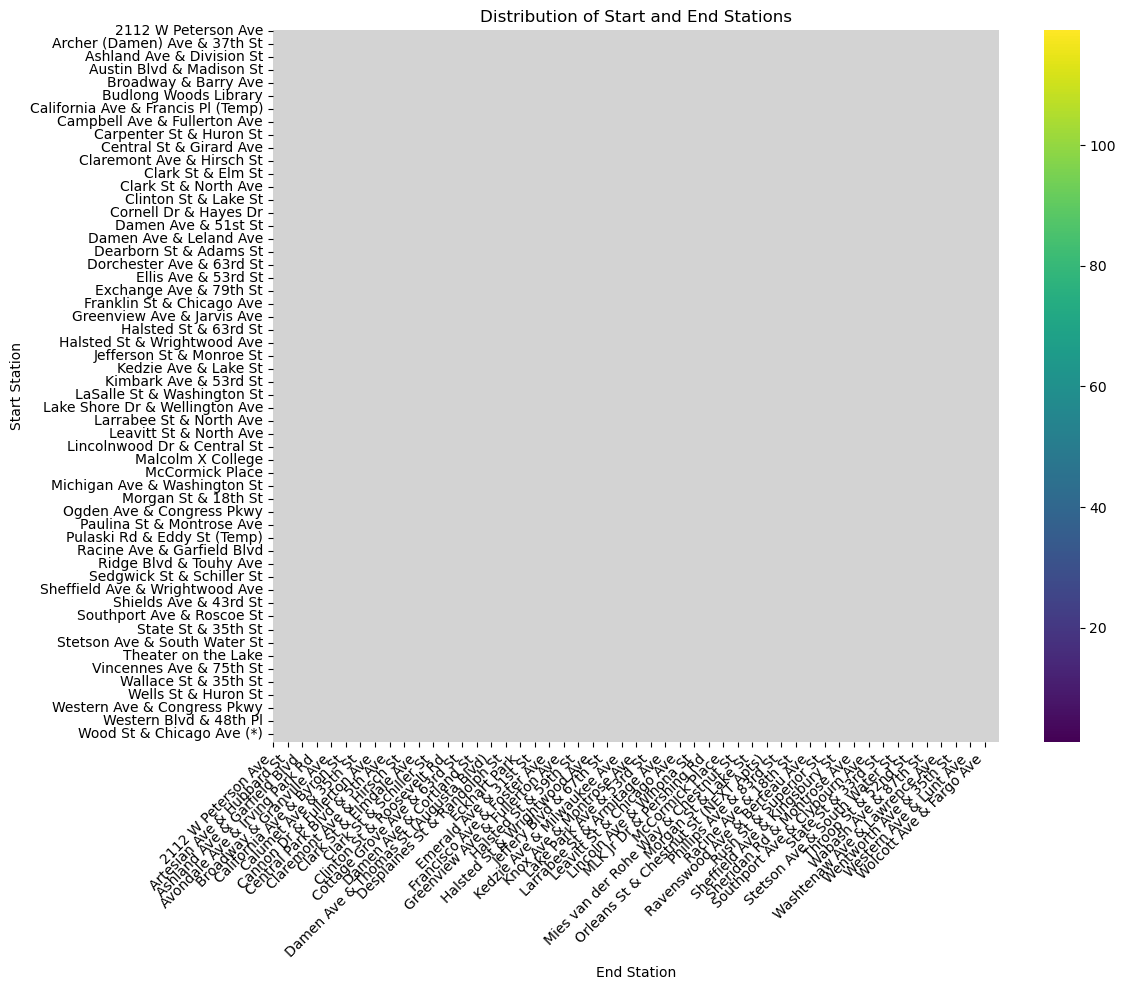

In [12]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(station_matrix, cmap='viridis', linecolor='lightgray', linewidths=0.1)
plt.title('Distribution of Start and End Stations')
plt.xlabel('End Station')
plt.ylabel('Start Station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [13]:
#Finally, a heatmap is plotted to visualize the distribution of start and end stations. The heatmap provides insights into the most common routes taken by riders.

# Analyzing Common Routes

In [14]:
# Analyze common routes
common_routes = df.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending=False).head(10)
#This step analyzes the most common routes taken by riders by grouping the data by start and end station names, counting the occurrences, and selecting the top 10 routes.

# Visualizing Spatial Distribution

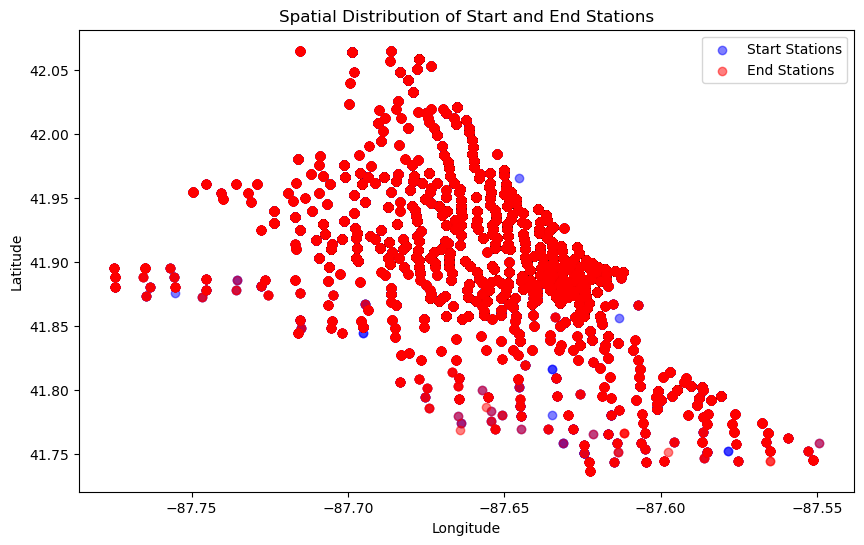

In [15]:
# Spatial Distribution
plt.figure(figsize=(10, 6))
plt.scatter(df['start_lng'], df['start_lat'], color='blue', label='Start Stations', alpha=0.5)
plt.scatter(df['end_lng'], df['end_lat'], color='red', label='End Stations', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Start and End Stations')
plt.legend()
plt.show()
#This step visualizes the spatial distribution of start and end stations on a scatter plot, where each point represents a station location.

# Analyzing Temporal Trends

In [16]:
# Temporal Trends
df['hour'] = df['started_at'].dt.hour
hourly_usage = df.groupby('hour').size()
# Here, we analyze temporal trends by extracting the hour component from the 'started_at' timestamp and grouping the data by hour to understand the hourly bike usage pattern.

# Analyzing User Behavior

In [17]:
# User Behavior
member_start_stations = df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
casual_start_stations = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
#This step analyzes user behavior by identifying the top start stations for both member and casual riders separately.

# Visualizing Common Start-End Station Pairs

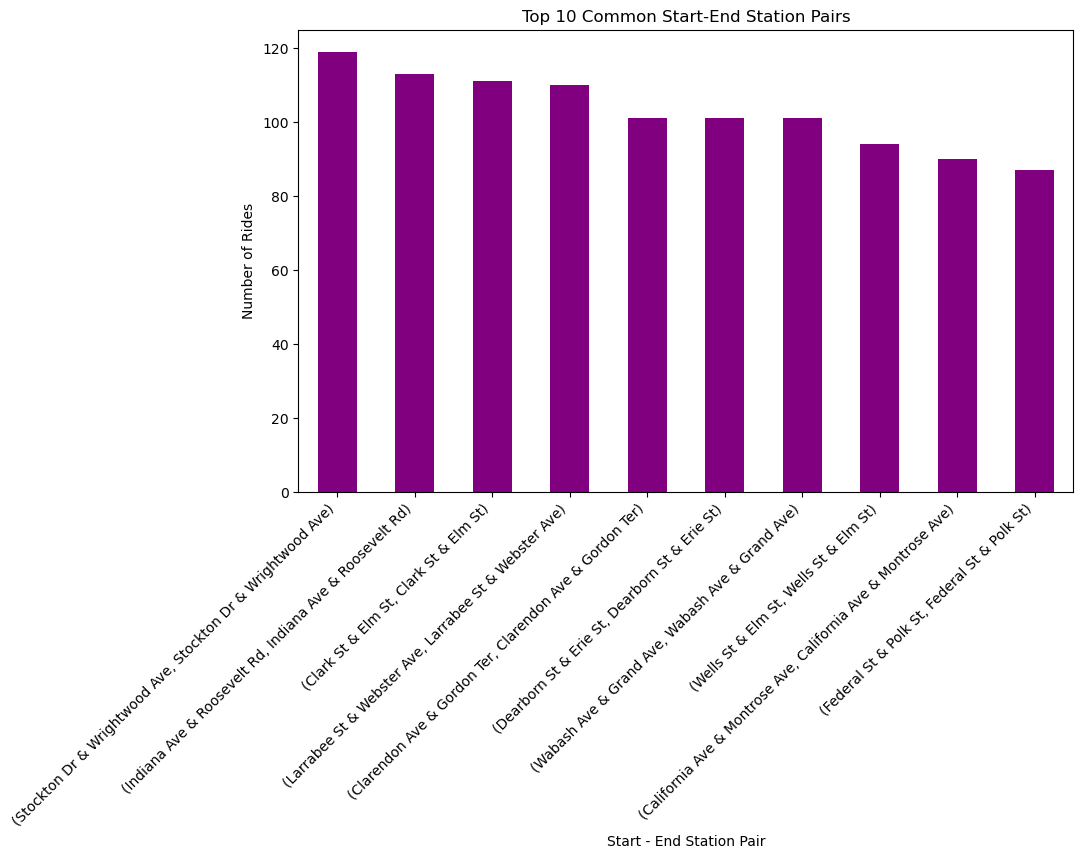

In [18]:
# Visualize common start-end station pairs
common_start_end_stations = df.groupby(['start_station_name', 'end_station_name']).size().nlargest(10)
common_start_end_stations.plot(kind='bar', color='purple', figsize=(10, 6))
plt.xlabel('Start - End Station Pair')
plt.ylabel('Number of Rides')
plt.title('Top 10 Common Start-End Station Pairs')
plt.xticks(rotation=45, ha='right')
plt.show()
#This step visualizes the top 10 common start-end station pairs by plotting a bar chart showing the number of rides for each pair.

# Analyzing Station Utilization Over Time

C:\Users\hp\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


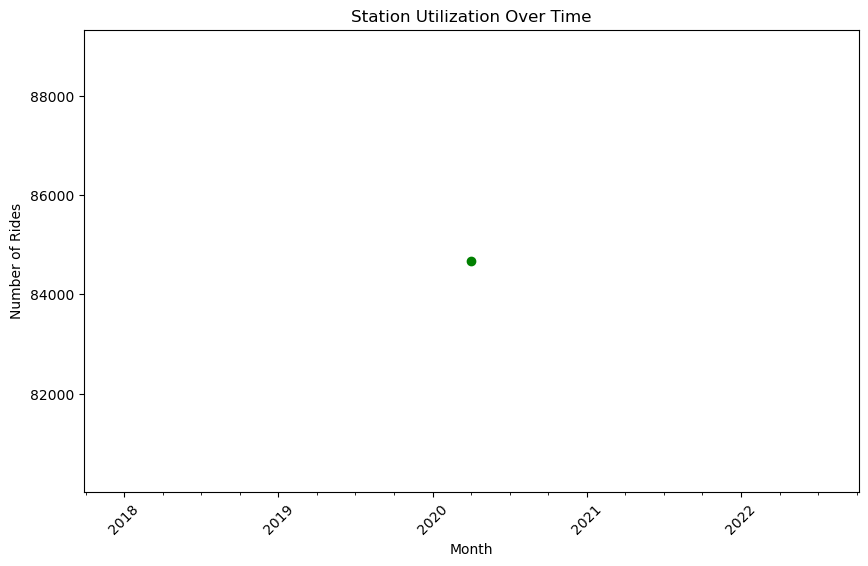

In [19]:
# Analyze station utilization over time
station_utilization_over_time = df.groupby(pd.Grouper(key='started_at', freq='M')).size()
station_utilization_over_time.plot(kind='line', marker='o', color='green', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Station Utilization Over Time')
plt.xticks(rotation=45)
plt.show()
#This step analyzes station utilization over time by grouping the data by month and plotting a line chart to visualize the trend in the number of rides over months.

 # Analyzing Ride Duration Distribution

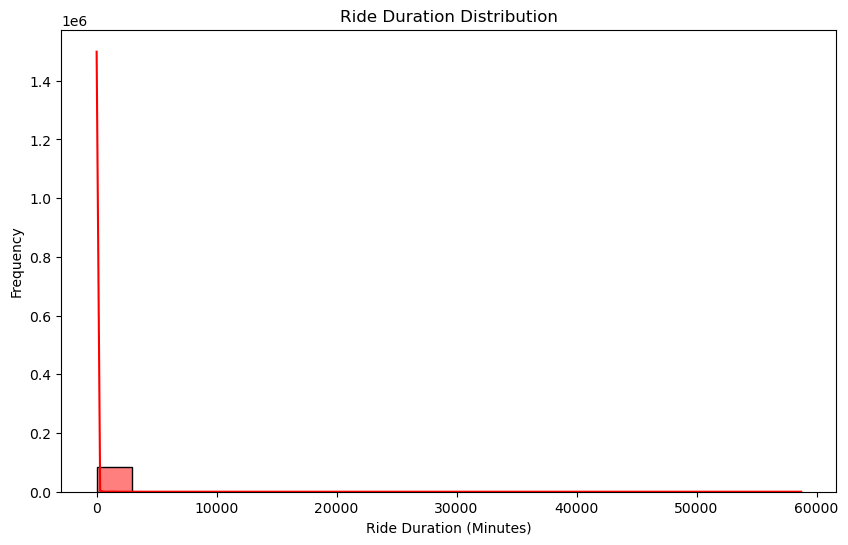

In [28]:
# Analyze ride duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ride_duration_minutes'], bins=20, kde=True, color='red')
plt.title('Ride Duration Distribution')
plt.xlabel('Ride Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()
#Here, we analyze the distribution of ride durations by plotting a histogram, showing the frequency of rides over different duration intervals.

# Analyzing Popular Rideable Types

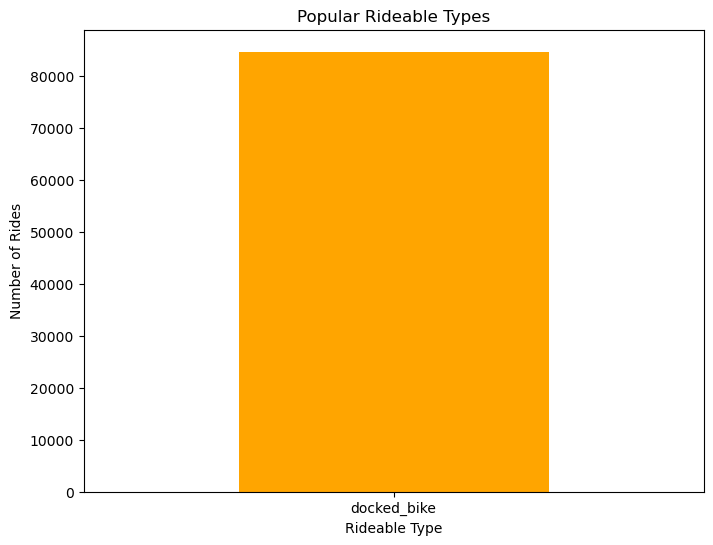

In [21]:
# Analyze popular rideable types
rideable_type_counts = df['rideable_type'].value_counts()
rideable_type_counts.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Popular Rideable Types')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.show()
#This step analyzes the popularity of different rideable types by plotting a bar chart showing the number of rides for each rideable type.

# Analyzing Hourly Ride Patterns for Members and Casual Users

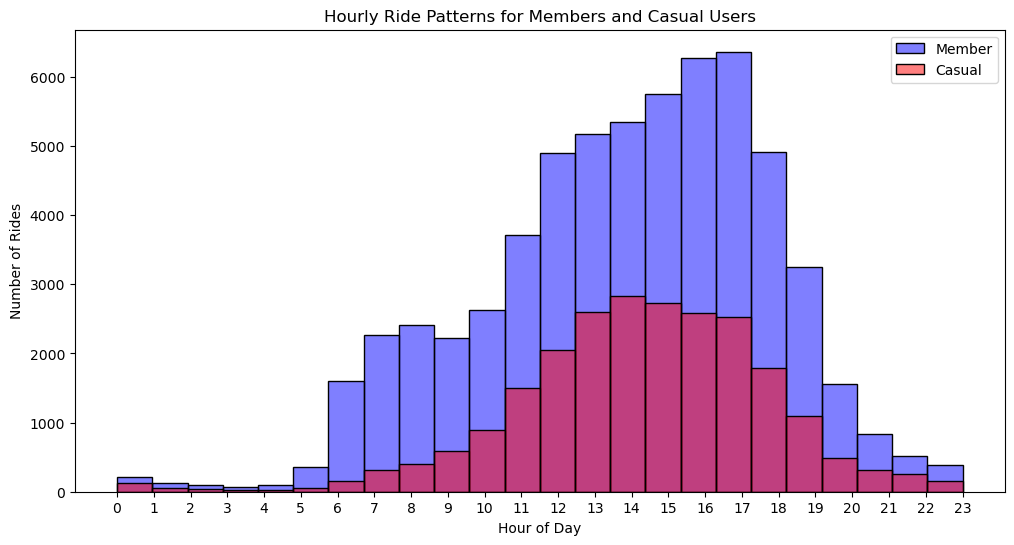

In [22]:
# Analyze hourly ride patterns for members and casual users
plt.figure(figsize=(12, 6))
sns.histplot(df[df['member_casual'] == 'member']['started_at'].dt.hour, bins=24, color='blue', label='Member', alpha=0.5)
sns.histplot(df[df['member_casual'] == 'casual']['started_at'].dt.hour, bins=24, color='red', label='Casual', alpha=0.5)
plt.title('Hourly Ride Patterns for Members and Casual Users')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend()
plt.xticks(range(24))
plt.show()
#This step analyzes the hourly ride patterns for members and casual users separately by plotting histograms showing the distribution of ride starts across different hours of the day.

# Analyzing Ride Duration by Rideable Type and Member Type

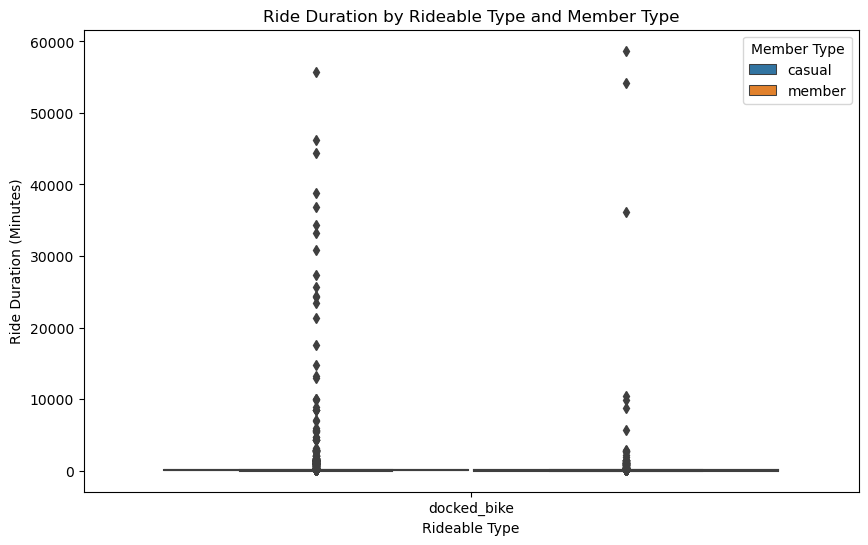

In [23]:
# Analyze ride duration by rideable type and member type
plt.figure(figsize=(10, 6))
sns.boxplot(x='rideable_type', y='ride_duration_minutes', hue='member_casual', data=df)
plt.title('Ride Duration by Rideable Type and Member Type')
plt.xlabel('Rideable Type')
plt.ylabel('Ride Duration (Minutes)')
plt.legend(title='Member Type')
plt.show()
#This step examines the ride duration distribution across different rideable types and member types by plotting boxplots, allowing us to compare the ride durations for each combination of rideable type and member type.

# Analyzing Geographic Distribution of Rides

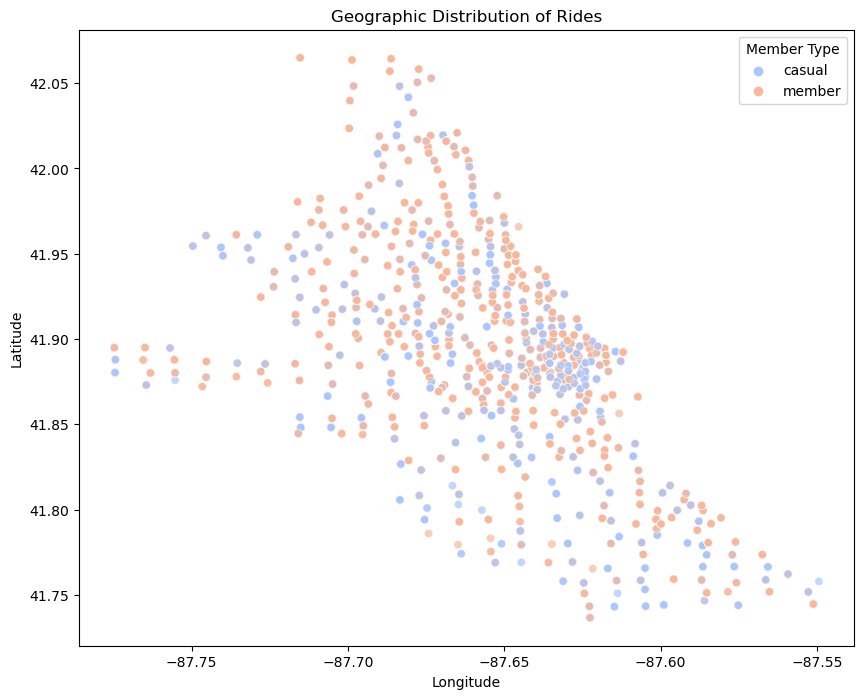

In [24]:
# Analyze geographic distribution of rides
plt.figure(figsize=(10, 8))
sns.scatterplot(x='start_lng', y='start_lat', hue='member_casual', data=df, palette='coolwarm', alpha=0.7)
plt.title('Geographic Distribution of Rides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Member Type')
plt.show()
# This step visualizes the geographic distribution of rides by plotting a scatter plot of ride start locations (latitude and longitude) with different colors representing member types (member or casual).

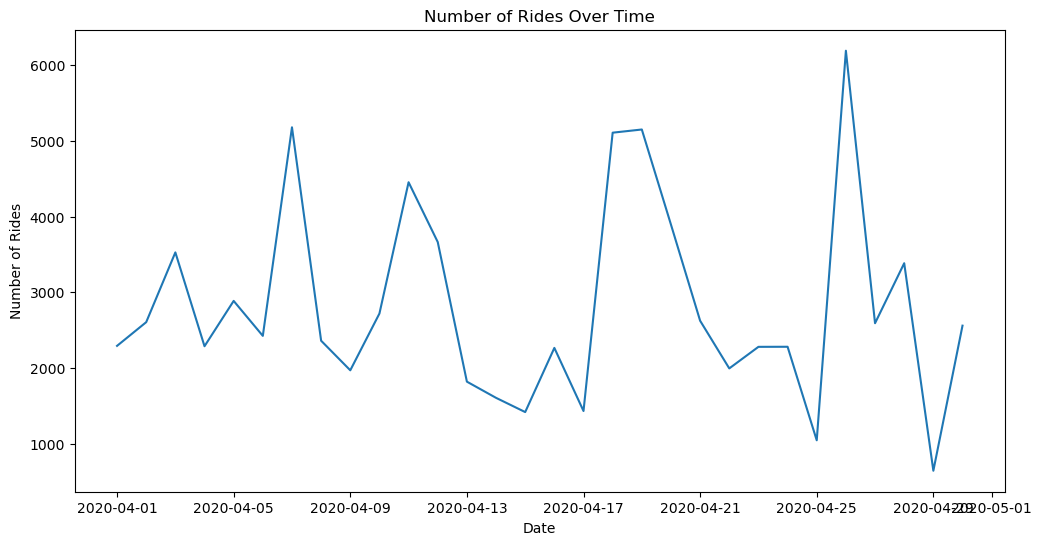

In [25]:
# Time-based Analysis
df['start_date'] = df['started_at'].dt.date
rides_by_date = df.groupby('start_date').size()
plt.figure(figsize=(12, 6))
rides_by_date.plot()
plt.title('Number of Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()